In [11]:
import numpy as np
import pandas as pd
import json

In [12]:
def parse_list_json(filename):
    try:
        with open('/home/lab/dev/rl_vdo/webrtc-tests/aiortc-test/'+ filename, 'r') as f:
            recv_message = json.load(f)
#             recv_message = process_list_packets(recv_message)
        # print(recv_message)
    except FileNotFoundError:
        print("Error: The file 'recv_message.json' does not exist.")

    return recv_message

In [15]:
recv = parse_list_json("recv_message.json")
send = parse_list_json("send_message.json")

In [97]:
recv

[{'roundTripTime': 0.006350917236258393,
  'jitter': 1.098,
  'packetsLost': 0,
  'packetsReceived': 49519},
 {'roundTripTime': 0.0072719263257274395,
  'jitter': 0.694,
  'packetsLost': 0,
  'packetsReceived': 49856},
 {'roundTripTime': 0.007062337444699505,
  'jitter': 1.056,
  'packetsLost': 0,
  'packetsReceived': 50112},
 {'roundTripTime': 0.004479060801684069,
  'jitter': 0.803,
  'packetsLost': 0,
  'packetsReceived': 50393},
 {'roundTripTime': 0.004137166380232157,
  'jitter': 0.914,
  'packetsLost': 0,
  'packetsReceived': 50584},
 {'roundTripTime': 0.003352519369038784,
  'jitter': 0.717,
  'packetsLost': 0,
  'packetsReceived': 50836},
 {'roundTripTime': 0.0026776365534410913,
  'jitter': 1.183,
  'packetsLost': 0,
  'packetsReceived': 51001},
 {'roundTripTime': 0.0026389935548551896,
  'jitter': 1.333,
  'packetsLost': 0,
  'packetsReceived': 51226},
 {'roundTripTime': 0.00239129401995959,
  'jitter': 1.555,
  'packetsLost': 0,
  'packetsReceived': 51382},
 {'roundTripTime'

In [16]:
send

[{'Current FPS': 23.970497848801333,
  'estimate_bw': 4374.688,
  'target_bitrate': 1000.0,
  'fpsTarget': 2500.0,
  'current_bitrate': 2163.956,
  'frame_delay': 1.6270000000000095},
 {'Current FPS': 23.978201634877653,
  'estimate_bw': 4374.688,
  'target_bitrate': 1000.0,
  'fpsTarget': 2500.0,
  'current_bitrate': 4489.504,
  'frame_delay': 1.8349999999999795},
 {'Current FPS': 23.98081534772173,
  'estimate_bw': 4374.688,
  'target_bitrate': 1000.0,
  'fpsTarget': 2500.0,
  'current_bitrate': 3446.616,
  'frame_delay': 1.6680000000000064},
 {'Current FPS': 23.977433004231205,
  'estimate_bw': 4374.688,
  'target_bitrate': 1000.0,
  'fpsTarget': 2500.0,
  'current_bitrate': 1511.688,
  'frame_delay': 0.7090000000000032},
 {'Current FPS': 23.958333333333133,
  'estimate_bw': 4374.688,
  'target_bitrate': 1000.0,
  'fpsTarget': 2500.0,
  'current_bitrate': 1603.104,
  'frame_delay': 0.960000000000008},
 {'Current FPS': 23.983315954119032,
  'estimate_bw': 4374.688,
  'target_bitrate'

In [18]:
rate_lists = []
for key in send:
#     print(key['current_bitrate'])
    rate_lists.append(key['current_bitrate'])

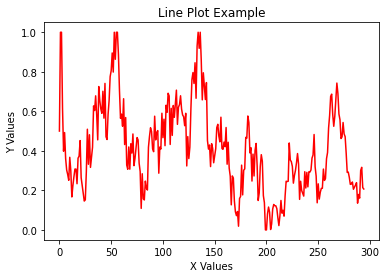

In [91]:
import matplotlib.pyplot as plt

# Example data
x_values = [1, 2, 3, 4, 5]
y_values = [1, 3, 2, 4, 5]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the line
ax.plot(norm_rate_list_norm_10, 'r',label='Line 1')
# ax.plot(norm_rate_list_10,'b',label='5')
# ax.plot(norm_rate_list_10,'g',label='5')
# ax.plot(norm_rate_list_20,'y',label='5')


# Add labels and title
ax.set_xlabel('X Values')
ax.set_ylabel('Y Values')
ax.set_title('Line Plot Example')

# Show the plot
plt.show()


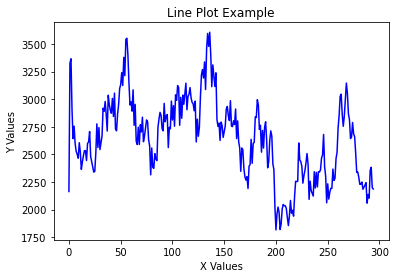

In [94]:
import matplotlib.pyplot as plt

# Example data
x_values = [1, 2, 3, 4, 5]
y_values = [1, 3, 2, 4, 5]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the line
# ax.plot(norm_rate_list_norm_10, 'r',label='Line 1')
ax.plot(norm_rate_list_10,'b',label='5')
# ax.plot(norm_rate_list_10,'g',label='5')
# ax.plot(norm_rate_list_20,'y',label='5')


# Add labels and title
ax.set_xlabel('X Values')
ax.set_ylabel('Y Values')
ax.set_title('Line Plot Example')

# Show the plot
plt.show()


In [71]:
class RollingAverage:
    def __init__(self, window_size):
        self.window_size = window_size
        self.states_history = []
        self.total_state_value = 0

    def update(self, state_value):
        self.total_state_value += state_value
        self.states_history.append(state_value)
        if len(self.states_history) > self.window_size:
            self.total_state_value -= self.states_history.pop(0)
        rolling_avg_state_value = self.total_state_value / len(self.states_history)
        return rolling_avg_state_value


In [88]:
class RollingAverageNorm:
    def __init__(self, window_size):
        self.window_size = window_size
        self.states_history = []
        self.total_state_value = 0
        self.min_state_value = float('inf')
        self.max_state_value = float('-inf')

    def update(self, state_value):
        self.total_state_value += state_value
        self.states_history.append(state_value)
        if len(self.states_history) > self.window_size:
            self.total_state_value -= self.states_history.pop(0)
        rolling_avg_state_value = self.total_state_value / len(self.states_history)
        if rolling_avg_state_value < self.min_state_value:
            self.min_state_value = rolling_avg_state_value
        if rolling_avg_state_value > self.max_state_value:
            self.max_state_value = rolling_avg_state_value
        if self.max_state_value == self.min_state_value:
            rescaled_state_value = 0.5  # set to a default value when range is zero
        else:
            rescaled_state_value = (rolling_avg_state_value - self.min_state_value) / (self.max_state_value - self.min_state_value)
        return rescaled_state_value


In [89]:
# rolling_avg_5 = RollingAverage(window_size=5)
rolling_avg_10 = RollingAverage(window_size=10)
# rolling_avg_20 = RollingAverage(window_size=20)
rolling_avg_norm_10 = RollingAverageNorm(window_size=10)

norm_rate_list_5 = []
norm_rate_list_10 = []
norm_rate_list_20 = []
norm_rate_list_norm_10 = []

count = 0
for i in rate_lists[:]:
#     norm_rate_list_5.append(rolling_avg_5.update(i))
    norm_rate_list_10.append(rolling_avg_10.update(i))
    norm_rate_list_norm_10.append(rolling_avg_norm_10.update(i))

#     norm_rate_list_20.append(rolling_avg_20.update(i))


In [96]:
norm_rate_list

[2163.956,
 3326.73,
 3366.6920000000005,
 2902.9410000000003,
 2642.9736000000003,
 2756.2873333333337,
 2598.6074285714285,
 2528.5135,
 2501.028888888889,
 2465.8804000000005,
 2605.8112,
 2523.0016,
 2364.6008,
 2432.7984000000006,
 2487.1216000000004,
 2534.264,
 2533.9392000000003,
 2445.0000000000005,
 2600.4728000000005,
 2612.7560000000003,
 2707.5480000000007,
 2481.845600000001,
 2432.931200000001,
 2380.144000000001,
 2339.624800000001,
 2346.943200000001,
 2517.4656000000014,
 2776.6536000000015,
 2563.3864000000012,
 2742.9768000000013,
 2544.439200000001,
 2604.4804000000013,
 2667.605200000001,
 2918.582800000001,
 2890.409200000001,
 2979.7028000000005,
 2865.3108,
 2711.9068,
 3036.3460000000005,
 2950.982000000001,
 2900.1572000000006,
 2873.286000000001,
 3007.681200000001,
 2844.006800000001,
 3055.4076000000014,
 2730.730000000001,
 2714.070000000001,
 2865.984400000001,
 2951.5620000000017,
 3096.7764000000016,
 3132.535600000002,
 3240.6312000000016,
 3124.32640